<a href="https://colab.research.google.com/github/felipebmuniz/ciencia-de-dados-trabalho-final/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final de Topicos de Computação 1

# Parte de Visualização dos dados e limpeza dos mesmos.

In [2]:
# Importação das bibliotecas para visualização dos dados e trabalhas com o formato de date
# pip install pandas
# pip install matplotlib   
import pandas as pd
from datetime import date

In [4]:
# Acesso dos dados por meio da pasta DadosRU no github - dados disponibilizados pelo professor referentes o RU
data_1 = pd.read_csv("./DadosRU/part-1.csv", sep=';')
data_2 = pd.read_csv("./DadosRU/part-2.csv")
data_3 = pd.read_csv("./DadosRU/part-3.csv")

# Acesso dos dados por meio do google drive - dados disponibilizados pelo professor referentes o RU
# data_1 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-1", sep=';')
# data_2 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-2")
# data_3 = pd.read_csv("/content/drive/MyDrive/DadosRU/part-3")

In [5]:
# Observando a amostra de dados da parte 1
data_1.head()

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [6]:
# Observando a amostra de dados da parte 2
data_2.head()

,Data,Qt_almoco,Qt_jantar
0,2017-05-01,0,0
1,2017-05-02,734,491
2,2017-05-03,805,501
3,2017-05-04,807,555
4,2017-05-05,671,375


In [7]:
# Observando a amostra de dados da parte 3
data_3.head()

,Unnamed: 0,Data,Qt_almoco,Qt_jantar
0,0,2018-01-02,0,0
1,1,2018-01-03,0,0
2,2,2018-01-04,0,0
3,3,2018-01-05,0,0
4,4,2018-01-08,69,0


In [8]:
# Padronizando os valores das colunas da parte 1 entre os dados disponibilizados
data_1.columns = ['Data', 'Qt_almoco', 'Qt_jantar']
data_1.head()

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [50]:
#  Verifica as colunas existentes na parte 3
print(data_3.columns)

Index(['Data', 'Qt_almoco', 'Qt_jantar'], dtype='object')


In [10]:
#  Removendo a coluna 0 onde não teria seria utilizada  para a análise dos dados
data_3.pop(data_3.columns[0])

0        0
1        1
2        2
3        3
4        4
      ... 
577    577
578    578
579    579
580    580
581    581
Name: Unnamed: 0, Length: 582, dtype: int64

In [11]:
# verificando a remoção da coluna ociosa
data_3.head()

,Data,Qt_almoco,Qt_jantar
0,2018-01-02,0,0
1,2018-01-03,0,0
2,2018-01-04,0,0
3,2018-01-05,0,0
4,2018-01-08,69,0


In [12]:
# Junção dos dados do RU em um dataframe
dataframe_completo_RU = pd.concat([data_1, data_2, data_3])
print(dataframe_completo_RU)

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
...,...,...,...
577,2020-03-25,0,0
578,2020-03-26,11,13
579,2020-03-27,15,14
580,2020-03-30,13,12


In [13]:
# dataframe_completo_RU.to_csv("dataframe_completo_RU.csv", encoding = 'utf-8')

# Análise dos dados obtidos

In [49]:
# Visualização dos dados 
print(dataframe_completo_RU)

            Qt_almoco  Qt_jantar
Data                            
2016-01-04        364        294
2016-01-05        489        363
2016-01-06        522        401
2016-01-07        514        349
2016-01-08        409        218
...               ...        ...
2020-03-25          0          0
2020-03-26         11         13
2020-03-27         15         14
2020-03-30         13         12
2020-03-31         14          9

[1270 rows x 2 columns]


## Hipóteses sobre os dados 

> Como se pode observar os dados, eles se distribuem em relação dos dias ao longos dos anos de 2016 e 2020, possuindo quantidade de pratos servidos durante o almoço e o jantar.

> Tendo em vista essa representação dos dados, uma **Série Tempotal** podemos obter a quantidade diaria, por mês e ano, e também por média e soma, e em entervalo de tempo. Se obeservará um gráfico onde se terá a noção dos valores.

> Com uma **Regressão Linear** poderá se observar a relação de valores, assim atribuindo a quantidade de almoços para que se sirva a quantidade de jantares. Treinando o comportamento da regressão para realizar essa análise.

# Técnicas de Regressão e Séries Temporais


In [15]:
# Variáveis para trabalhar as técnicas
df_reg = dataframe_completo_RU
df_temp = dataframe_completo_RU

## Séries Temporais



In [16]:
# Verificando a interpretação da coluna de Data
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 581
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       1270 non-null   object
 1   Qt_almoco  1270 non-null   int64 
 2   Qt_jantar  1270 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.7+ KB


In [17]:
# Para série temporal a coluna de eixo temporal dever possuir o valor de dateTime. Por tanto, utilizaremos a função pd.to_datetime().
df_temp.Data = pd.to_datetime(df_temp.Data)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 0 to 581
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       1270 non-null   datetime64[ns]
 1   Qt_almoco  1270 non-null   int64         
 2   Qt_jantar  1270 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 39.7 KB


In [48]:
# Transformaremos a coluna Data no nosso coluna indexadora dos demais itens utilizando o comando df.set_index().
df_temp.set_index('Data', inplace=True)
print(df_temp)

,Qt_almoco,Qt_jantar
Data,,
2016-01-04,364,294
2016-01-05,489,363
2016-01-06,522,401
2016-01-07,514,349
2016-01-08,409,218
...,...,...
2020-03-25,0,0
2020-03-26,11,13
2020-03-27,15,14


In [19]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1270 entries, 2016-01-04 to 2020-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Qt_almoco  1270 non-null   int64
 1   Qt_jantar  1270 non-null   int64
dtypes: int64(2)
memory usage: 29.8 KB


<AxesSubplot:xlabel='Data'>

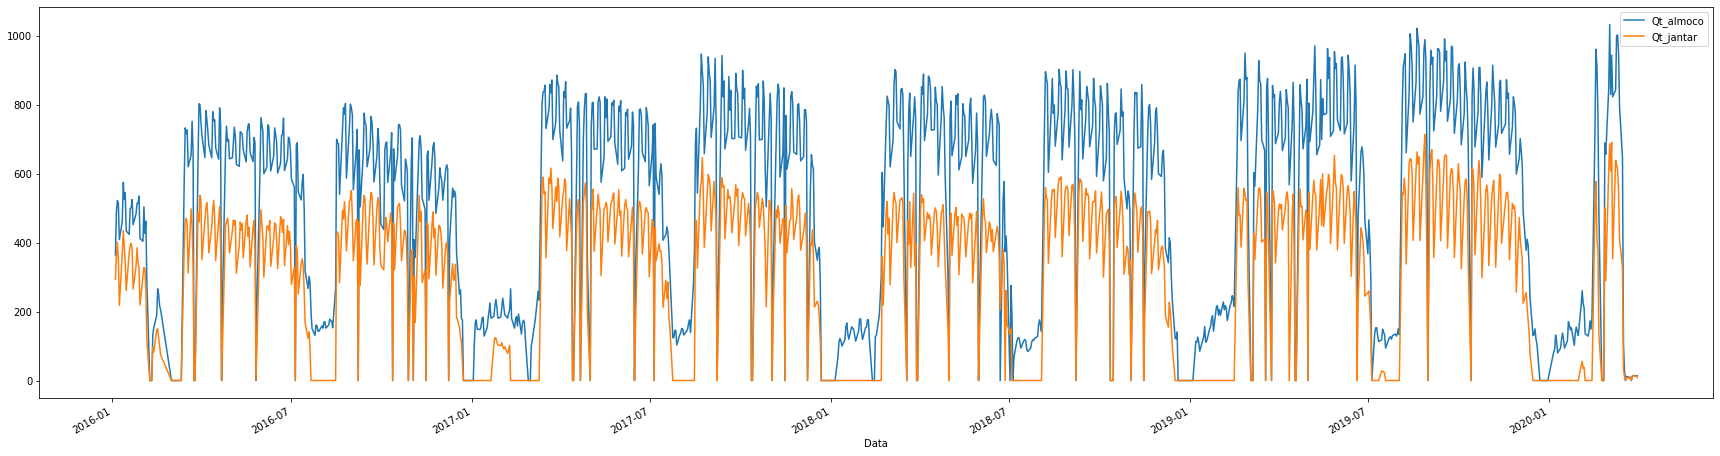

In [27]:
#  Plotagem do gráfico para análise dos valores
df_temp.plot(figsize=(30, 8))

<AxesSubplot:xlabel='Data'>

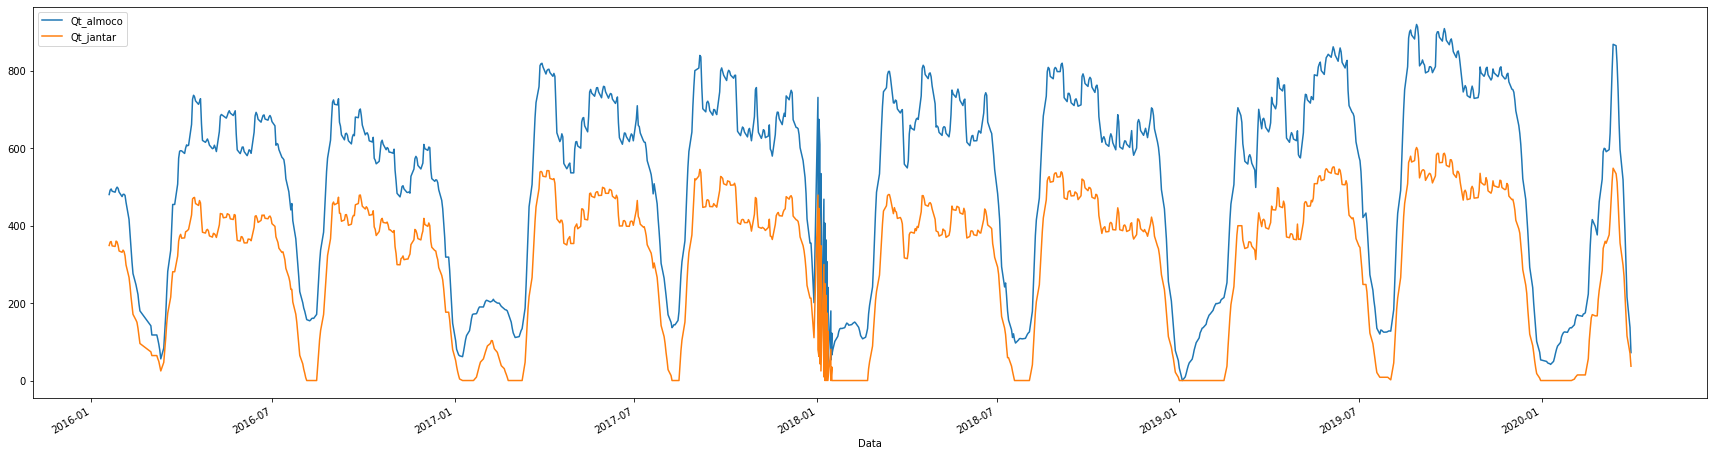

In [28]:
# Por possuir bastante ruídos, será aplicado a técnica de médias movéis para a eliminação desses ruídos. Como se trata de o período de anos, a média móvel será em 12 períodos.
# Dada pela função Series.rolling(num_de_periodos).mean().plot()
df_temp.rolling(12).mean().plot(figsize=(30, 8))

<AxesSubplot:xlabel='Data'>

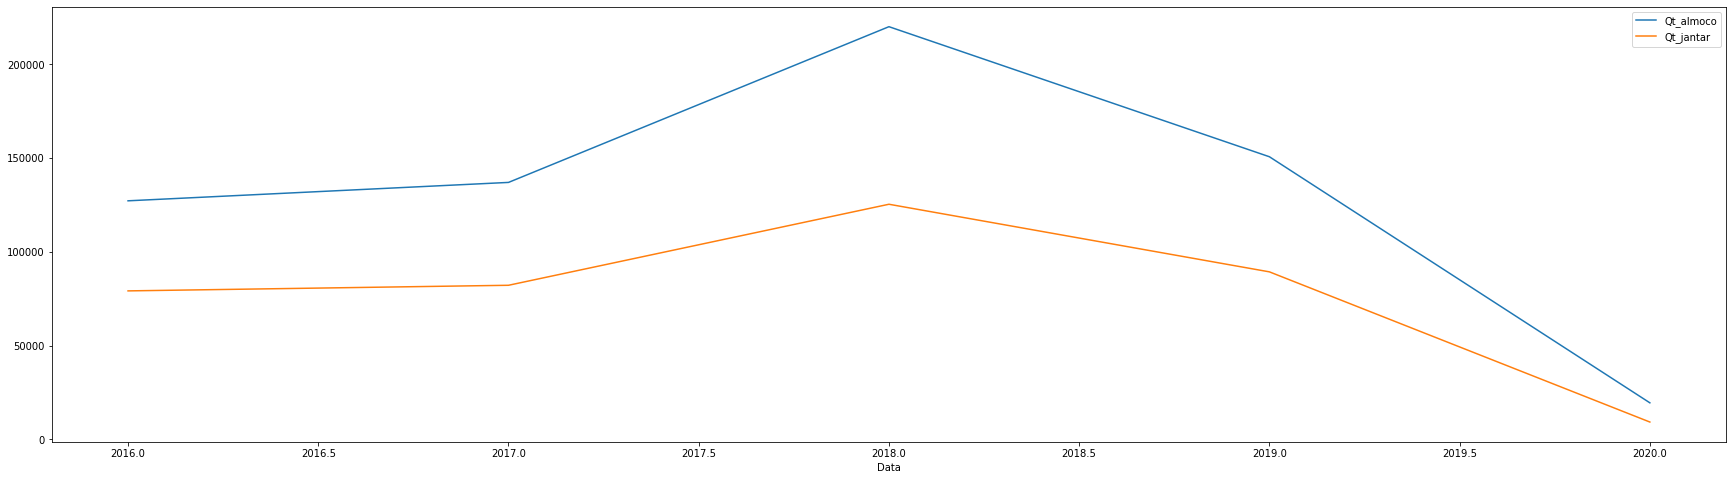

In [29]:
# Fazendo a análise por meio de agrupamento do ano do total consumido 
df_temp.groupby(df_temp.index.year).sum().plot(figsize=(30, 8))

<AxesSubplot:xlabel='Data'>

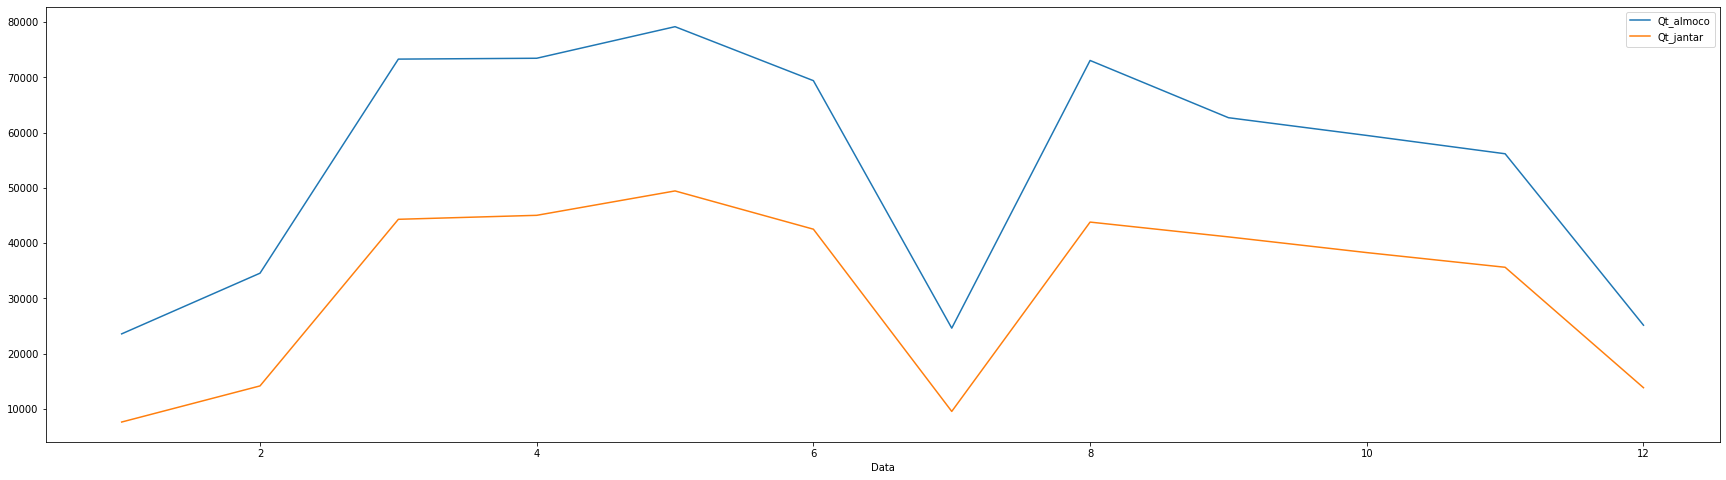

In [30]:
# Fazendo a análise por meio de agrupamento por mês do total consumido 
df_temp.groupby(df_temp.index.month).sum().plot(figsize=(30, 8))

<AxesSubplot:xlabel='Data'>

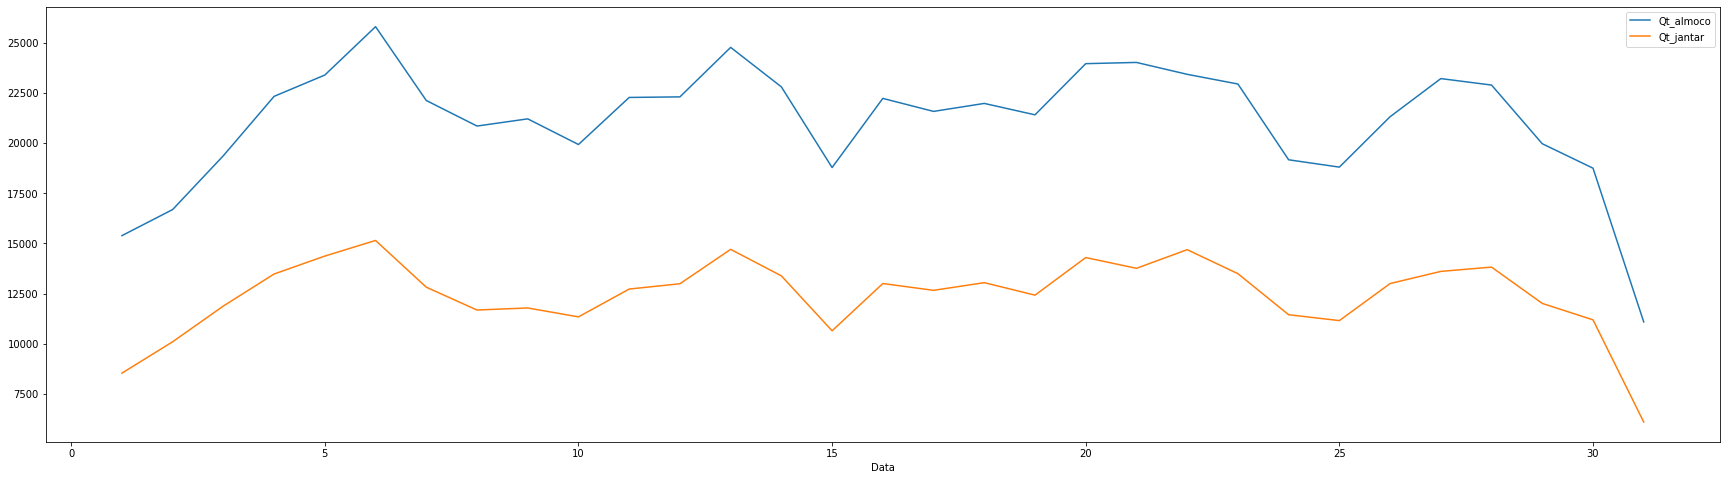

In [31]:
# Fazendo a análise por meio de agrupamento por dia do total consumido 
df_temp.groupby(df_temp.index.day).sum().plot(figsize=(30, 8))

## Regressão Linear

In [33]:
# Biblioteca de algoritmos de aprendizado de máquina, a scikit-learn.
# Essa biblioteca possui um conjunto de ferramentas para pré-processamento de dados e modelos de aprendizagem de máquina.
# pip install -U scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [34]:
df_reg.describe()

,Qt_almoco,Qt_jantar
count,1270.000000,1270.000000
mean,515.511811,303.391339
std,314.322950,226.777077
min,0.000000,0.000000
25%,165.250000,0.000000
50%,645.500000,382.500000
75%,782.750000,500.000000
max,1033.000000,714.000000


In [35]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1270 entries, 2016-01-04 to 2020-03-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Qt_almoco  1270 non-null   int64
 1   Qt_jantar  1270 non-null   int64
dtypes: int64(2)
memory usage: 29.8 KB


In [36]:
# Vamos começar selecionando nossas features e target, entradas e saídas ou simplesmente X e y são nomes comuns que podem aparecer na literatura.
# Será feito a relação que se pode obter de almoços em contra partida aos jantares. Se obterá a relação de se em um dia a quantidades de almoços irá representar em jantares.
X = df_reg[['Qt_almoco']]
y = df_reg.Qt_jantar

In [37]:
# O parâmetro test_size vai definir o tamanho dos nossos dados selecionados para teste, o tamanho dessa divisão, não existe uma regra para isso,
# vai depender de cada problema e principalmente do tamanho do conjunto de dados que temos para treino.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [45]:
# Criando o modelo LinearRegression
regr = LinearRegression()
# Realizar treinamento do modelo
regr.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)
# Visualização dos 20 primeiros resultados
print(y_pred[:20])

[475.4424783   57.29651215 398.84094837 382.67732279 450.84565677
 190.82211479 398.84094837  72.7573714  258.28768243 397.43541571
  28.48309263 397.43541571 533.77208367 369.32476252 575.23529712
 424.84330257  64.32417544 -59.36269858  21.45542933 417.11287294]


In [39]:
# Erro Médio Absoluto (Mean Absolute Error)
# O erro médio absoluto (MAE) é a média da soma de todos os e do nosso gráfico de erros, as sua análise sofre uma interferência devido aos erros positivos e negativos se anularem.
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

MAE: 46.05


In [40]:
# Erro Quadrado Médio (Mean Squared Error)
# O erro quadrado médio (MSE) é a média da soma de todos os e elevados ao quadrado do nosso gráfico, 
# o fato de ele ter as diferenças elevadas ao quadrados resolve o problema de os erros positivos e negativos se anulam, sendo mais preciso que o MAE.
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 3419.23


In [41]:
# Coeficiente de Determinação (R2 Score)
# O coeficiente de Determinação (R²) varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear.
# Explicando a variância da variável dependente a partir da variável independente.
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

R2 Score: 0.93


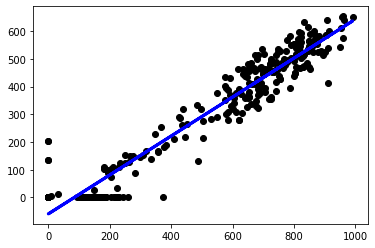

In [42]:
# Plotagem dos dados 
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

# Data App

## Executar somente em máquina local

In [43]:
# instalação da biblioteca de interface web
# pip install streamlit
import streamlit as st

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

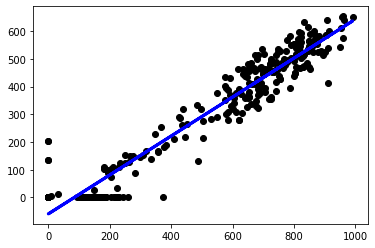

In [53]:
# Começando uma página para visualização dos dados com o streamlit
# Agora, utilizando a biblioteca Streamlit, iremos escrever um título e uma breve descrição sobre o que será a nossa aplicação.
st.title("Página do Trabalho Final da disciplina de Tópicos de Computação")
st.markdown(
  """
  Trabalho de análise dos dados sobre a quantidade de almoços e jantares disponibilizados no Restaurante Universitário (RU) da Universidade Federal do Ceará (UFC) Campus Sobral.
  """
)
st.markdown(
  """

  __**Equipe:**__
  - Felipe Barros Muniz - 398233
  - Isaias do Carmo Carneiro - 398069
  - Waklio Xavier Neto - 366738
  - Ingrynd Vasconcelos Loiola - 356675
  """
)
st.markdown('---')

st.sidebar.header("Configurações")

st.markdown("# Parte de Visualização dos dados e limpeza dos mesmos.")
st.markdown('''A etapa de limpeza e visualização dos dados se consiste em acessar os dados disponibilizados para análise, verificar sua estrutura inicial, e se estiver em um estado aceitável permanecer como está, porém, se for necessário uma modificação para uma padronização dos dados terá que ser realizada.

- Dados parte 1: Os dados foram separados na leitura pelo carácter `;` para facilitar a visualização, também foi mudada a nomenclatura de suas colunas para uma padronização dos datasets;

- Dados parte 2: Os dados vieram de uma forma aceitável sem a necessidade de modificações;

- Dados parte 3: Foi realizada a remoção de uma coluna de dados ociosa, onde estava desgasconizando a padronização os datasets e poluindo os dados;

Com as modificações realizadas os dados foram unificados em uma só dataframe.
''')

if st.sidebar.checkbox("Dataset part-1", True):
  st.markdown("### Dataset part-1")
  st.write(data_1)

if st.sidebar.checkbox("Dataset part-2", True):
  st.markdown("### Dataset part-2")
  st.write(data_2)

if st.sidebar.checkbox("Dataset part-3", True):
  st.markdown("### Dataset part-3")
  st.write(data_3)

if st.sidebar.checkbox("Mostrar tabela RU (2016-2020)", True):
  st.markdown("### Tabela Restaurante Universitário")
  st.write(dataframe_completo_RU)

st.markdown('---')

st.markdown("# Análise dos dados obtidos")
st.markdown("## Hipóteses sobre os dados ")
st.markdown('''Como se pode observar os dados, eles se distribuem em relação dos dias ao longos dos anos de 2016 e 2020, possuindo quantidade de pratos servidos durante o almoço e o jantar.

Tendo em vista essa representação dos dados, uma **Série Tempotal** podemos obter a quantidade diaria, por mês e ano, e também por média e soma, e em entervalo de tempo. Se obeservará um gráfico onde se terá a noção dos valores.

Com uma **Regressão Linear** poderá se observar a relação de valores, assim atribuindo a quantidade de almoços para que se sirva a quantidade de jantares. Treinando o comportamento da regressão para realizar essa análise.
''')

st.markdown("# Técnicas de Regressão e Séries Temporais")
st.markdown('''Para se trabalhar com a as técnicas de Regressão e Séries Temporais, se utilizou das variáveis def_reg e def_temp que possuem como base o dataframe_completo_RU.''')
st.markdown("## Séries Temporais")
st.markdown('''Para série temporal a coluna de eixo temporal dever possuir o valor de dateTime. Por tanto, utilizaremos a função pd.to_datetime().

Transformaremos a coluna Data no nosso coluna indexadora dos demais itens utilizando o comando df.set_index().
''')

if st.sidebar.checkbox("Dataframe Série Temporal", True):
  st.markdown("### Dataframe Série Temporal")
  st.write(df_temp)

if st.sidebar.checkbox("Gráfico da Série Temporal", True):
  st.markdown("### Plotagem do gráfico para análise dos valores:")
  fig, ax = plt.subplots(figsize=(30, 8))
  ax.plot(df_temp.index, df_temp['Qt_almoco'], color='blue', linewidth=2)
  ax.plot(df_temp.index, df_temp['Qt_jantar'], color='red', linewidth=2)
  st.pyplot(fig)


  st.markdown("### Gráfico da Série Temporal (Tratamento de ruído):")
  st.markdown('''Por possuir bastante ruídos, será aplicado a técnica de médias movéis para a eliminação desses ruídos. Como se trata de o período de anos, a média móvel será em 12 períodos.''')
  fig, ax = plt.subplots(figsize=(30, 8))
  ax.plot(df_temp.index, df_temp['Qt_almoco'].rolling(12).mean(), color='blue', linewidth=2)
  ax.plot(df_temp.index, df_temp['Qt_jantar'].rolling(12).mean(), color='red', linewidth=2)
  st.pyplot(fig)

  # st.markdown("### Fazendo a análise por meio de agrupamento do ano do total consumido:")
  # fig, ax = plt.subplots(figsize=(30, 8))
  # ax.plot(df_temp.groupby(df_temp.index.year).moda(), df_temp['Qt_almoco'].groupby(df_temp.index.year).sum(), color='blue', linewidth=2)
  # ax.plot(df_temp.groupby(df_temp.index.year), df_temp['Qt_jantar'].groupby(df_temp.index.year).sum(), color='red', linewidth=2)
  # st.pyplot(fig)
  # # st.write(df_temp.groupby(df_temp.index.year))
  # # st.write(df_temp['Qt_jantar'].groupby(df_temp.index.year).sum())
  # st.markdown('---')


st.markdown("## Regressão Linear")
st.markdown('''Biblioteca de algoritmos de aprendizado de máquina, a scikit-learn. Essa biblioteca possui um conjunto de ferramentas para pré-processamento de dados e modelos de aprendizagem de máquina.

Vamos começar selecionando nossas features e target, entradas e saídas ou simplesmente X e y são nomes comuns que podem aparecer na literatura.

Será feito a relação que se pode obter de almoços em contra partida aos jantares. Se obterá a relação de se em um dia a quantidades de almoços irá representar em jantares.

O parâmetro test_size vai definir o tamanho dos nossos dados selecionados para teste, o tamanho dessa divisão, não existe uma regra para isso, vai depender de cada problema e principalmente do tamanho do conjunto de dados que temos para treino.
''')
if st.sidebar.checkbox("Gráfico da Regressão Linear", True):
  st.markdown("### Gráfico da Regressão Linear:")
  fig, ax = plt.subplots()
  ax.scatter(X_test, y_test, color='black')
  ax.plot(X_test, y_pred, color='blue', linewidth=3)
  st.pyplot(fig)
  st.markdown('---')


In [ ]:
# Teremos que converter o arquivo de notebook em um script python por meio da biblioteca jupyter
# pip install jupyter

# Depois da instalação devemos executar o seguinte comando no terminal:
# jupyter nbconvert --to script ./TrabalhoFinal.ipynb 